In [2]:
from AdvancedStockGame import AdvancedStockGame
from AdvancedStockGameTD3 import AdvancedStockGameTD3
import numpy as np
from stable_baselines3 import PPO, TD3
import csv
from datetime import datetime
import argparse
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

def evaluate(model, env):
    obs, info = env.reset()

    portfolio = []
    actions = []
    total_reward = 0
    i = 0
    while True:  
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, term, info = env.step(action)
        total_reward += reward
        portfolio.append(env.get_portfolio_value())
        i += 1
        if done:
            break
    


    return actions, portfolio, total_reward

def pct(x):
    return str(np.round(x, decimals=2)) + '%'
def rnd(x):
    return str(np.round(x, decimals=2))


Data Modeling
#-Portfolio Value vs Timestep (many lines 1 for each model)
-Endportfolio Value vs Total Trainsteps (1 line, 1 point for each model)
-Action View 
    -Y axis stock price
    -X axis Timestep
    -Markers where best performing models make actions

In [3]:
dataFile = 'full_data.csv'
df = pd.read_csv('full_comparison.csv')


for model_name in os.listdir('models'):
    model_folder_path = 'models' + '/' + model_name
    new_row = {'Model Name': [], 'Final Portfolio Value': [], 'Total Trainsteps': [], 'Total Reward': []}
    for filename in os.listdir(model_folder_path):
        try:
            if filename.endswith('.zip'):
                if(filename == f'{model_name}.zip' or filename in df['Model Name'].values):
                    continue
                if(len(model_name.split('w')) > 1):
                    window_size = int(model_name.split('w')[1])
                else:
                    window_size = 1024
                env = AdvancedStockGame(dataFile, window_size=window_size)
                model = PPO.load(model_folder_path + '/' + filename, env=env, device='cuda:1')
                actions, portfolio, total_reward = evaluate(model, env)
                new_row['Final Portfolio Value'].append(portfolio[-1])
                new_row['Total Trainsteps'].append(model.num_timesteps)
                new_row['Model Name'].append(filename)
                new_row['Total Reward'].append(total_reward)

                print(f'{filename} done')
                df.to_csv('full_comparison.csv', index=False)
                del model
        except:
            print(f'Error with {filename}')

    df = pd.concat([df, pd.DataFrame(new_row)], ignore_index=True)
df.sort_values(by='Total Trainsteps', inplace=True)
df.to_csv('full_comparison.csv', index=False)


PPO_10104832.zip done
PPO_10235904.zip done
PPO_10366976.zip done
PPO_1060864.zip done
PPO_1126400.zip done
PPO_1191936.zip done
PPO_1257472.zip done
PPO_1323008.zip done
PPO_1388544.zip done
PPO_143360.zip done
PPO_1454080.zip done
PPO_1585152.zip done
PPO_1716224.zip done
PPO_1847296.zip done
PPO_1978368.zip done
PPO_208896.zip done
PPO_2109440.zip done
PPO_2240512.zip done
PPO_2371584.zip done
PPO_2502656.zip done
PPO_2633728.zip done
PPO_274432.zip done
PPO_2764800.zip done
PPO_2895872.zip done
PPO_3026944.zip done
PPO_3158016.zip done
PPO_3289088.zip done
PPO_339968.zip done
PPO_3420160.zip done
PPO_3551232.zip done
PPO_3682304.zip done
PPO_3813376.zip done
PPO_3944448.zip done
PPO_405504.zip done
PPO_4075520.zip done
PPO_4206592.zip done
PPO_4337664.zip done
PPO_4468736.zip done
PPO_4599808.zip done
PPO_471040.zip done
PPO_4730880.zip done
PPO_4861952.zip done
PPO_4993024.zip done
PPO_5124096.zip done
PPO_5255168.zip done
PPO_536576.zip done
PPO_5386240.zip done
PPO_5517312.zip d

In [3]:
model_name = 'PPO'
model_folder_path = 'models' + '/' + model_name
dataFile = 'full_data.csv'
env = AdvancedStockGame(dataFile)
model = PPO.load(model_folder_path + '/' + model_name + '.zip', env=env, device='cuda:1')

In [10]:

df = pd.DataFrame()
dataFile = 'full_data.csv'
for model_name in os.listdir('models'):
    model_folder_path = 'models' + '/' + model_name
    new_row = {'Model Name': [], 'Learning Rate': [], 'Window Size': [], 'Batch Size': []}
    for filename in os.listdir(model_folder_path):
        if filename.endswith('.zip'):
            if(filename.split('_')[0] in new_row['Model Name']):
                continue
            try:
                if(len(model_name.split('w')) > 1):
                    window_size = int(model_name.split('w')[1])
                else:
                    window_size = 1024
            except:
                window_size = 1024
            env = AdvancedStockGame(dataFile, window_size=window_size)
            try:
                model = PPO.load(model_folder_path + '/' + filename, env=env, device='cuda:1')
                new_row['Learning Rate'].append(model.learning_rate)
                new_row['Window Size'].append(window_size)
                new_row['Batch Size'].append(model.batch_size)
                new_row['Model Name'].append(filename.split('_')[0])
                del model
            except:
                print(f'Error with {filename}')


            

    df = pd.concat([df, pd.DataFrame(new_row)], ignore_index=True)
df.to_csv('hyperparameters.csv', index=False)


Error with td3.zip


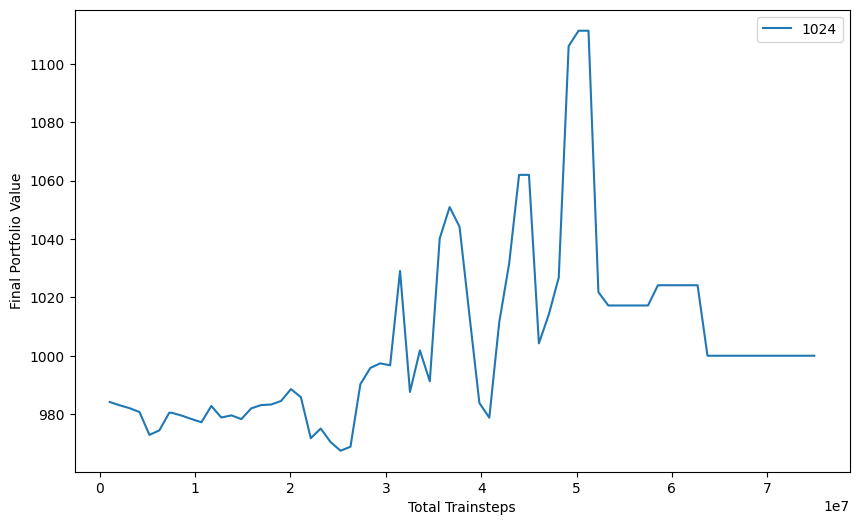

In [30]:
df = pd.read_csv('full_comparison.csv')
df['Split Model Name'] = df['Model Name'].apply(lambda x: x.split('_')[0])

unique_models = df['Split Model Name'].unique()
graph_models = ['BACSloew4096']
#graph_models = ['PPOe6','PPOe7', 'PPOe4']
labels = {
    'BACSloew4096': '1024',
}
#plot portfolio value (df['Final Portfolio Value']) vs total trainsteps (df['Total Trainsteps']) labels are model names (df['Model Name'])

plt.figure(figsize=(10, 6))
i = 0
for model in unique_models:
    if(model not in graph_models):
        continue
    # Filter the DataFrame for the current model
    model_df = df[df['Split Model Name'] == model]
    
    # Create a scatter plot for the current model
    plt.plot(model_df['Total Trainsteps'], model_df['Final Portfolio Value'], label=labels[model])
    i += 1
    
plt.legend()
plt.xlabel('Total Trainsteps')
plt.ylabel('Final Portfolio Value')
plt.show()


In [35]:
def evaluate_one(model, env):
    obs, info = env.reset()

    portfolio = []
    actions = []
    total_reward = 0
    first_date = None
    i = 0
    while True:  
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, term, info = env.step(action)
        if(action != 3):
            actions.append({
                'Action': int(np.array(action)),
                'Time': info['time']
            })
        if not first_date:
            first_date = info['time']
        total_reward += reward
        portfolio.append(env.get_portfolio_value())
        i += 1
        if done:
            break
    

    last_date = info['time']
    return actions, portfolio, total_reward, first_date, last_date

def pct(x):
    return str(np.round(x, decimals=2)) + '%'
def rnd(x):
    return str(np.round(x, decimals=2))

In [36]:
model_name = 'PPO'
full_model = 'models/BACSloew4096/BACSloew4096_50211600'
dataFile = 'full_data.csv'
env = AdvancedStockGame(dataFile, window_size=4096)
env.force_start_index = env.data_block.shape[1] - 10000
model = PPO.load(full_model, env=env, device='cuda:0')
actions, portfolio, total_reward, first_date, last_date = evaluate_one(model, env)

In [38]:
print(f'First Date: {first_date}')
print(actions, total_reward)
print(f'Last Date: {last_date}')
print(env.current_observation['portfolio'])
print(env.stock_names)

First Date: 20240325 15:06:00 US/Eastern
[{'Action': 2, 'Time': '20240327 10:22:00 US/Eastern'}, {'Action': 2, 'Time': '20240401 11:55:00 US/Eastern'}, {'Action': 2, 'Time': '20240410 13:43:00 US/Eastern'}, {'Action': 2, 'Time': '20240411 15:18:00 US/Eastern'}, {'Action': 0, 'Time': '20240415 15:46:00 US/Eastern'}, {'Action': 0, 'Time': '20240416 13:18:00 US/Eastern'}] -1893.0172673418597
Last Date: 20240416 15:59:00 US/Eastern
[-1  0 -1]
['BAC', 'TSLA', 'AAPL']
